In [35]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pickle

In [36]:
def substract_peds(row):
    return row - np.argmax(np.bincount(row))

def fast_plot(data, ax):
    ax.plot(data.transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$");
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");

def flatten_property(peaks, property):
    flat = []
    for i in range(0, len(peaks['properties'])):
        flat.extend(peaks['properties'][i][property])
    return np.array(flat)

In [37]:
data_folder = '/Users/emiliebertholet/cernbox/coldbox_data'
peak_folder = 'data_tests'

In [38]:
filename = f'{data_folder}/adc_data_run_25066_ch_40_all.npy' # cosmics
data = np.load(filename, allow_pickle=True).astype(np.int16)
data = np.apply_along_axis(substract_peds, axis=1, arr=data)

with open(f'{peak_folder}/peaks_cosmics_wlenNone.pkl', 'rb') as file:
    wlenNone_prom200 = pickle.load(file)
with open(f'{peak_folder}/peaks_cosmics_wlenNone_prom500.pkl', 'rb') as file:
    wlenNone_prom500 = pickle.load(file)
with open(f'{peak_folder}/peaks_cosmics_wlen500.pkl', 'rb') as file:
    wlen500_prom200 = pickle.load(file)
with open(f'{peak_folder}/peaks_cosmics_wlen500_prom500.pkl', 'rb') as file:
    wlen500_prom500 = pickle.load(file)

print('Cosmics')
print(data.shape)
print('peaks_cosmics_wlenNone', len(wlenNone_prom200['flat_peak_indices']))
print('peaks_cosmics_wlenNone_prom500', len(wlenNone_prom500['flat_peak_indices']))
print('peaks_cosmics_wlen500', len(wlen500_prom200['flat_peak_indices']))
print('peaks_cosmics_wlen500_prom500', len(wlen500_prom500['flat_peak_indices']))
print(wlenNone_prom200.keys())


Cosmics
(4200, 262144)
peaks_cosmics_wlenNone 64632
peaks_cosmics_wlenNone_prom500 27508
peaks_cosmics_wlen500 59299
peaks_cosmics_wlen500_prom500 26400
dict_keys(['mask', 'row_peak_indices', 'peak_heights', 'properties', 'flat_peak_indices'])


In [57]:
wlenNone_prom200['properties'][0].keys()

dict_keys(['plateau_sizes', 'left_edges', 'right_edges', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])

In [ ]:
prop_dict  = {
    'A':[wlenNone_prom200, 'peaks_cosmics_wlenNone'],
    'B':[wlenNone_prom500, 'peaks_cosmics_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_cosmics_wlen500'],
    'D':[wlen500_prom500, 'peaks_cosmics_wlen500_prom500']
}


## Plot waveforms

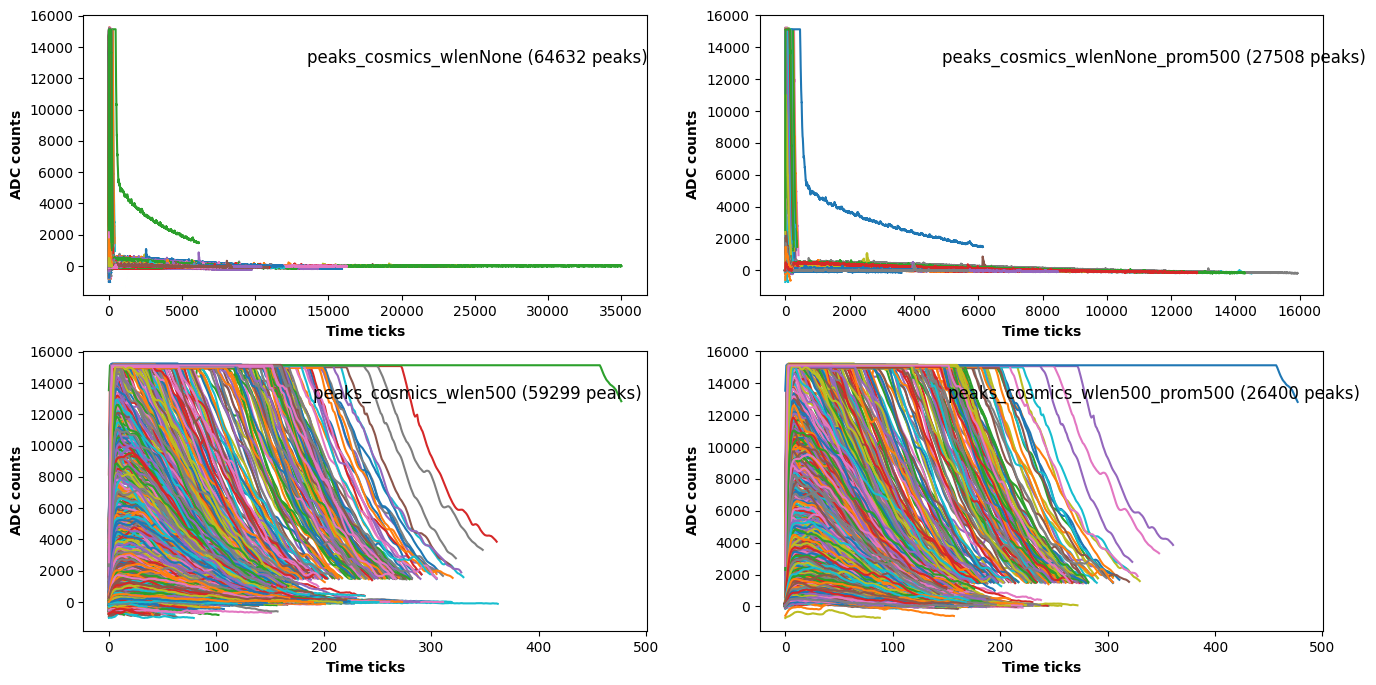

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

nTrigers = 500

j=0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    for trigger_idx in range(0, nTrigers):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            if properties[trigger_idx]['plateau_sizes'][i] > 0:
                l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1




### Waveform Selection

In [189]:
## remove saturated peaks
prop_dict  = {
    'A':[wlenNone_prom200, 'peaks_cosmics_wlenNone'],
    'B':[wlenNone_prom500, 'peaks_cosmics_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_cosmics_wlen500'],
    'D':[wlen500_prom500, 'peaks_cosmics_wlen500_prom500'],
}

# nTrigers = len(prop_dict[prop][0]['peak_heights'])
# print('number of trigger records', nTrigers)

for prop in prop_dict:
    
    maximum = 0
    for trigger_idx in range(0, len(prop_dict[prop][0]['peak_heights'])):
        peak_heights_rec = prop_dict[prop][0]['peak_heights'][trigger_idx]
        if len(peak_heights_rec)<1:
            continue
        if peak_heights_rec.max()>maximum: 
            maximum = peak_heights_rec.max()
    print('\n', prop_dict[prop][1], maximum)








 peaks_cosmics_wlenNone 16383

 peaks_cosmics_wlenNone_prom500 16383

 peaks_cosmics_wlen500 16383

 peaks_cosmics_wlen500_prom500 16383


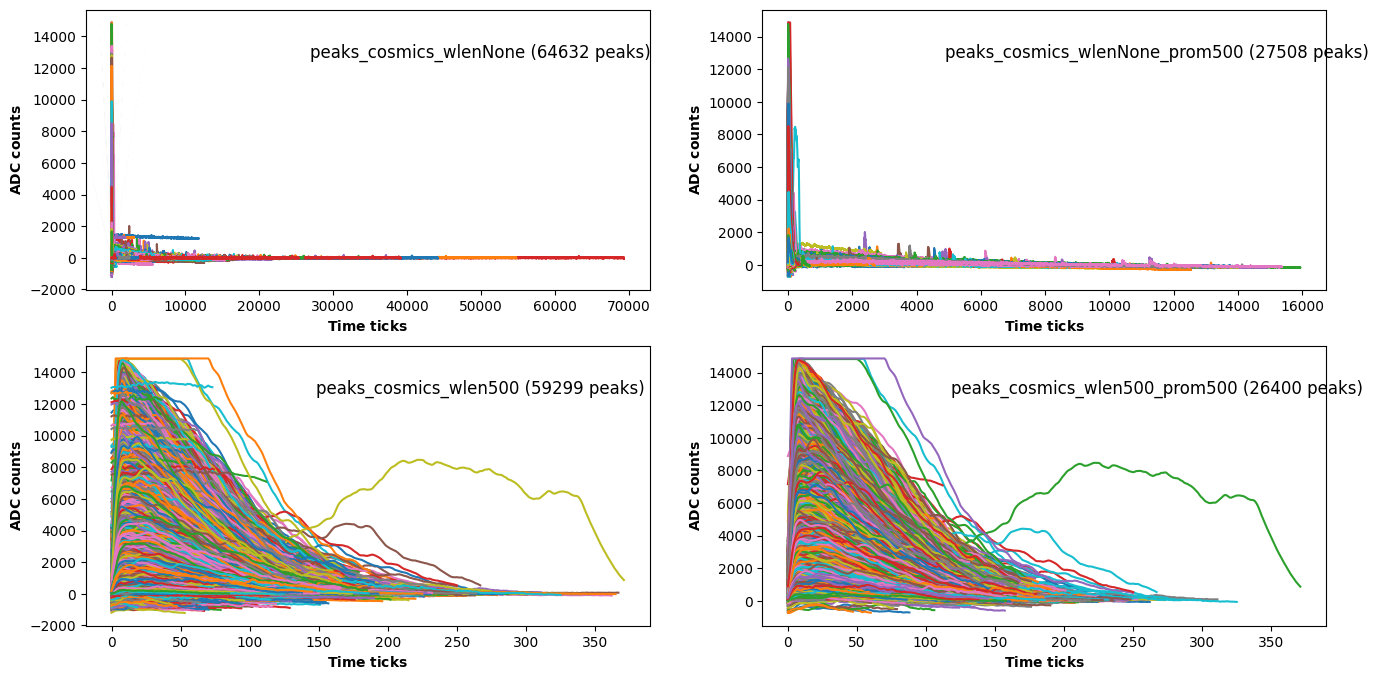

In [ ]:
## remove saturated peaks
prop_dict  = {
    'A':[wlenNone_prom200, 'peaks_cosmics_wlenNone'],
    'B':[wlenNone_prom500, 'peaks_cosmics_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_cosmics_wlen500'],
    'D':[wlen500_prom500, 'peaks_cosmics_wlen500_prom500'],
}

ADCsat   = 14880
nTrigers = len(prop_dict[prop][0]['peak_heights'])

print('number of trigger records', nTrigers)


fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    ax = axs.flatten()[j]

    for trigger_idx in range(0, nTrigers):
    # for trigger_idx in range(4, 5):
        trigger_record   = prop_dict[prop][0]['properties'][trigger_idx]
        peak_heights_rec = prop_dict[prop][0]['peak_heights'][trigger_idx]

        for i in np.arange(0, len(peak_heights_rec), 1):
            if peak_heights_rec[i] < ADCsat:
                l = int(np.ceil(trigger_record['left_ips'][i]))
                r = int(np.ceil(trigger_record['right_ips'][i]))
                ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1




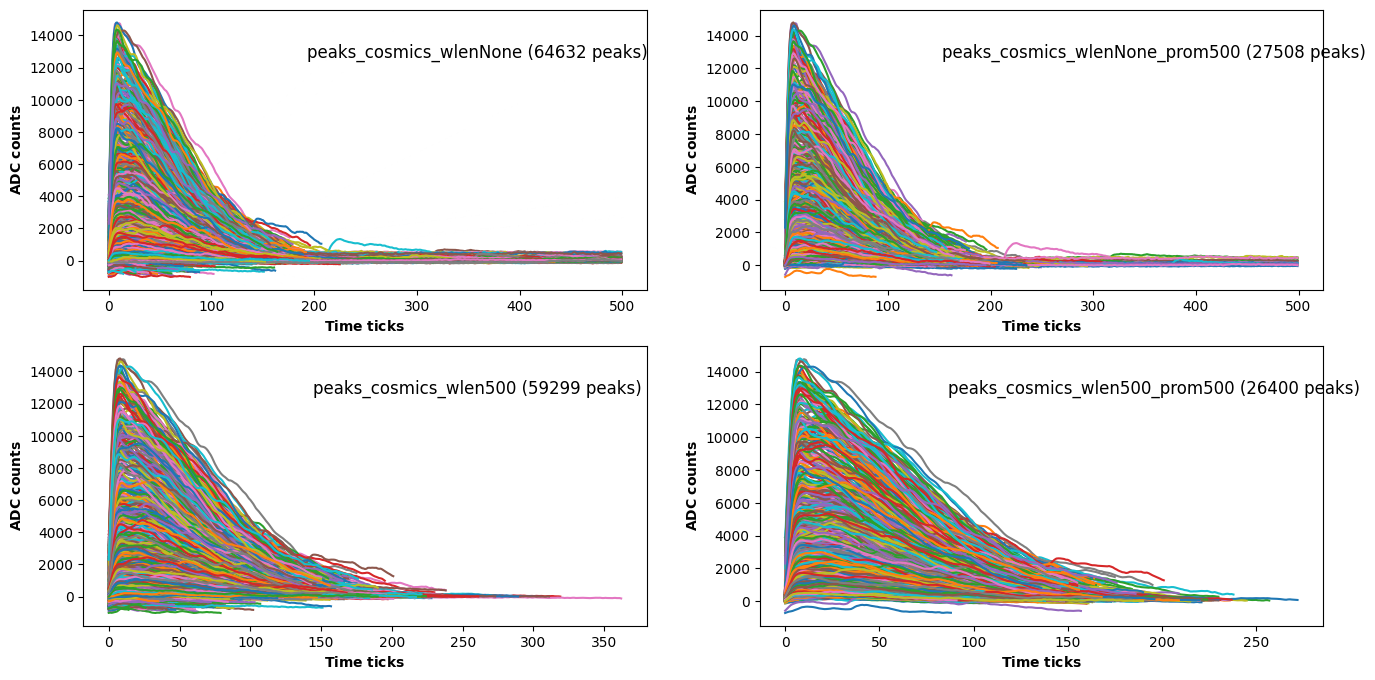

In [ ]:
## remove saturated peaks + cut at window > 500
prop_dict  = {
    'A':[wlenNone_prom200, 'peaks_cosmics_wlenNone'],
    'B':[wlenNone_prom500, 'peaks_cosmics_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_cosmics_wlen500'],
    'D':[wlen500_prom500, 'peaks_cosmics_wlen500_prom500'],
}

nTrigers = 500  # len(prop_dict[prop][0]['peak_heights'])


fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    ax = axs.flatten()[j]

    for trigger_idx in range(0, nTrigers):
        trigger_record   = prop_dict[prop][0]['properties'][trigger_idx]
        peak_heights_rec = prop_dict[prop][0]['peak_heights'][trigger_idx]

        for i in np.arange(0, len(peak_heights_rec), 1):
            if (peak_heights_rec[i] < ADCsat):
                l = int(np.ceil(trigger_record['left_ips'][i]))
                r = int(np.ceil(trigger_record['right_ips'][i]))
                if r-l > 500: r = l+500
                ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1




1087 15
427
946
14840
3114
355


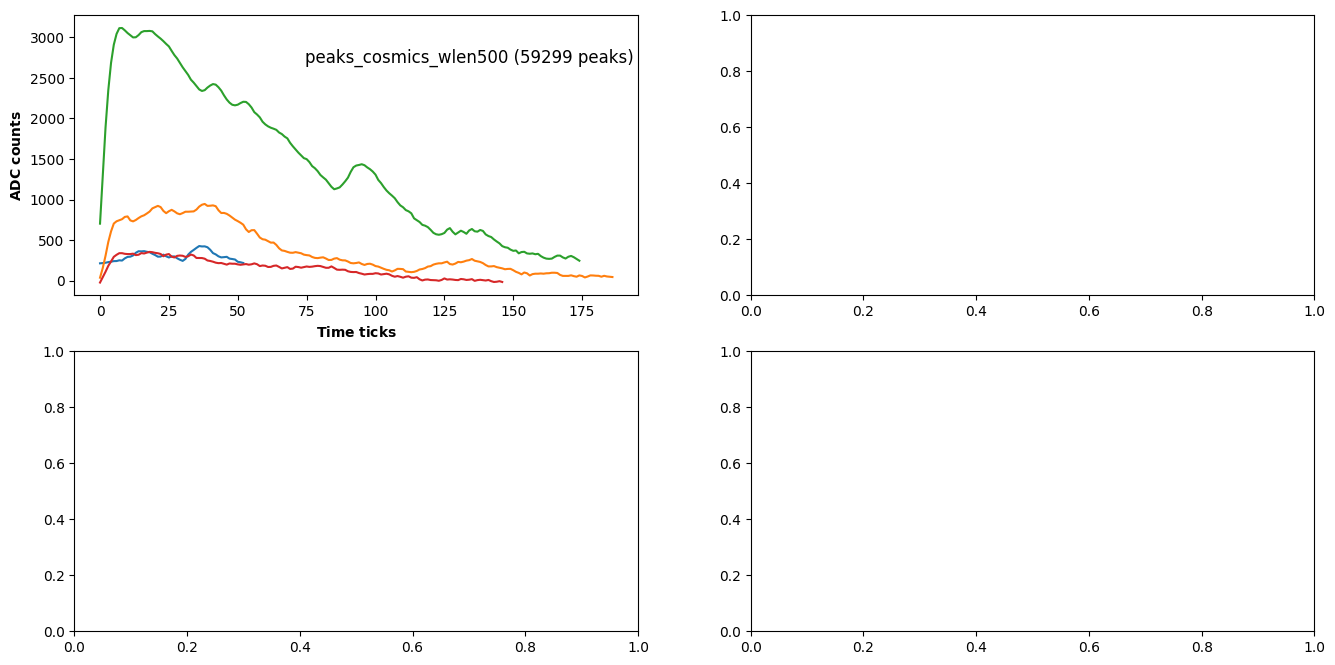

In [177]:
prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_cosmics_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_cosmics_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_cosmics_wlen500'],
    # 'D':[wlen500_prom500, 'peaks_cosmics_wlen500_prom500'],
}

ADCsat   = 14840

fig, axs = plt.subplots(2, 2, figsize=(16, 8))
j=0
for prop in prop_dict:
    ax = axs.flatten()[j]

    for trigger_idx in range(1087, 1088):
        trigger_record   = prop_dict[prop][0]['properties'][trigger_idx]
        peak_heights_rec = prop_dict[prop][0]['peak_heights'][trigger_idx]

        print(trigger_idx, len(peak_heights_rec))

        # for i in np.arange(0, len(peak_heights_rec), 1):
        for i in np.arange(10, 15, 1):
            print(peak_heights_rec[i])
            if (peak_heights_rec[i] < ADCsat):
                l = int(np.ceil(trigger_record['left_ips'][i]))
                r = int(np.ceil(trigger_record['right_ips'][i]))
                # print(l, r, l-r)
                if r-l > 500: r = l+500
                ax.plot(data[trigger_idx][l:r].transpose())
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    ax.set_title(f"{prop_dict[prop][1]} ({len(prop_dict[prop][0]['flat_peak_indices'])} peaks)", y=0.8, x = 0.7);
    j+=1



In [120]:
len(peak_heights_rec)

8

In [114]:
# properties = prop_dict['A'][0]['properties']
# for i in np.arange(0, len(properties[118]['left_ips']), 1):
#     print(properties[118]['plateau_sizes'][i])

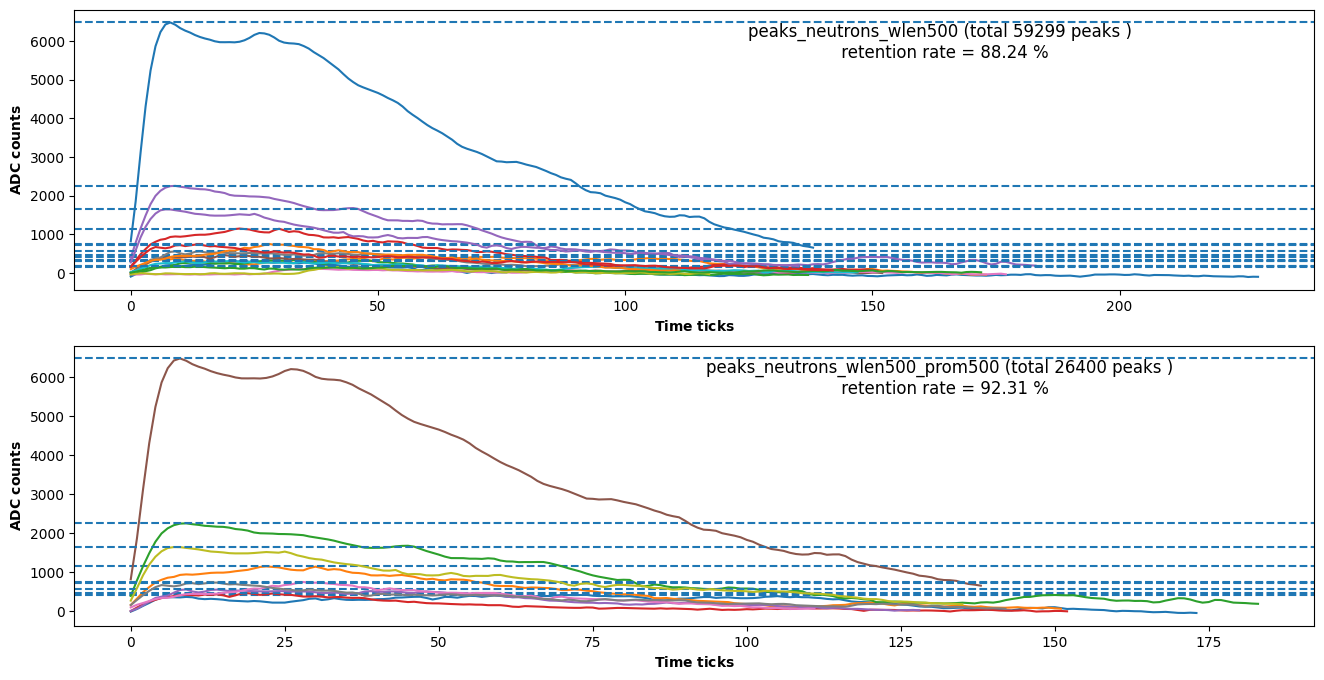

In [54]:
## make sure we get what we expect

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

prop_dict  = {
    # 'A':[wlenNone_prom200, 'peaks_neutrons_wlenNone'],
    # 'B':[wlenNone_prom500, 'peaks_neutrons_wlenNone_prom500'],
    'C':[wlen500_prom200,  'peaks_neutrons_wlen500'],
    'D':[wlen500_prom500, 'peaks_neutrons_wlen500_prom500'],
}

j=0
count, sel = 0, 0
for prop in prop_dict:
    ax = axs.flatten()[j]
    properties = prop_dict[prop][0]['properties']
    heights = prop_dict[prop][0]['peak_heights']
    # for trigger_idx in range(0, 500):
    for trigger_idx in range(0, 1):
        for i in np.arange(0, len(properties[trigger_idx]['left_ips']), 1):
            count+=1
            if (properties[trigger_idx]['plateau_sizes'][i]==1) and (properties[trigger_idx]['widths'][i]>100):
                        sel+=1
                        l = int(np.ceil(properties[trigger_idx]['left_ips'][i]))
                        r = int(np.ceil(properties[trigger_idx]['right_ips'][i]))
                        ax.plot(data[trigger_idx][l:r].transpose())
                        ax.axhline(y = heights[trigger_idx][i], linestyle='--')
    ax.set_xlabel(r"$\mathrm{\bf Time\ ticks}$")
    ax.set_ylabel(r"$\mathrm{\bf ADC\ counts}$");
    u = prop_dict[prop][0]['flat_peak_indices']
    ax.set_title(f"{prop_dict[prop][1]} (total {len(u)} peaks ) \n retention rate = {sel*100/count:.2f} %", y=0.8, x = 0.7);
    j+=1
